# Practicioners Seminar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

## Task 2

### A correlation heatmap for currencies and equity markets

In [2]:
currencies = "Data/FX_CHF_ALL_1971-2020.xlsx"
msci_all_local = "Data/MSCI_ALL_LOCAL.xlsx"
df_currencies = pd.read_excel(currencies, header=0, index_col=0, sheet_name="Sheet1")
df_msci_all_local = pd.read_excel(msci_all_local, header=3, index_col=0, sheet_name="CleanTimeSeries")

combined_df = pd.concat([df_currencies, df_msci_all_local], axis=1, join="inner")


In [3]:
combined_df

,CHFUSD,CHFEUR,CHFGBP,CHFAUD,CHFJPY,CHFCAD,MSDLSZ Index,MSDLWI Index,MSDLE15 Index,MSDLAS Index,MSDLCA Index,MSDLJN Index,MSDLUK Index,MXUS Index
Date,,,,,,,,,,,,,,
2020-12-21,1.1291,0.9219,0.8386,1.4880,116.655,1.4516,1373.148,1981.352,1575.377,1309.248,2194.804,1091.115,1798.630,3618.29
2020-12-18,1.1323,0.9235,0.8369,1.4857,116.924,1.4474,1400.882,1994.796,1609.748,1310.328,2199.244,1093.880,1830.686,3630.91
2020-12-17,1.1308,0.9216,0.8321,1.4830,116.543,1.4385,1401.998,1999.316,1612.119,1325.069,2212.786,1093.709,1837.093,3639.05
2020-12-16,1.1298,0.9261,0.8360,1.4911,116.852,1.4394,1390.313,1987.536,1608.909,1309.803,2201.855,1088.345,1844.342,3613.13
2020-12-15,1.1291,0.9290,0.8385,1.4937,117.050,1.4340,1375.116,1980.992,1596.729,1300.346,2192.114,1085.449,1828.248,3606.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971-01-08,0.2320,0.0000,0.0000,0.0000,83.004,0.0000,NaN,93.948,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-07,0.2320,0.0000,0.0000,0.0000,83.027,0.0000,NaN,93.948,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-06,0.2319,0.0000,0.0000,0.0000,83.005,0.0000,87.743,93.948,87.312,NaN,104.926,84.639,89.849,0.00


<AxesSubplot:>

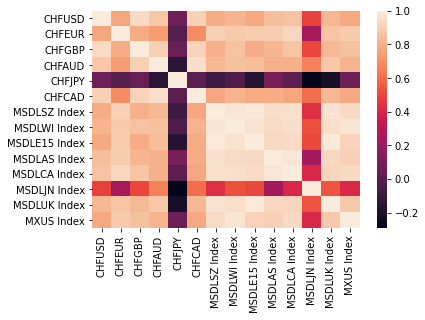

In [4]:
return_cor = combined_df.corr()
sns.heatmap(return_cor, xticklabels=return_cor.columns.values, yticklabels=return_cor.columns.values)

In [5]:
#combined_df.corr()

<AxesSubplot:>

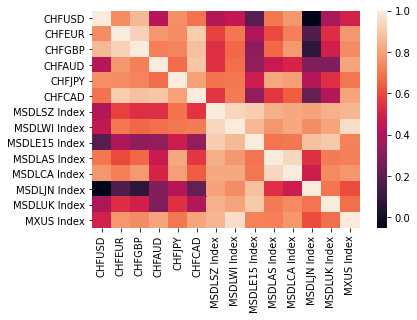

In [6]:
z=combined_df
z = z[z!=0].dropna()
sns.heatmap(z.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

In [7]:
# Return df
return_df = np.log(combined_df.sort_index()).diff()
return_df = return_df[return_df!=0].dropna()
return_df

,CHFUSD,CHFEUR,CHFGBP,CHFAUD,CHFJPY,CHFCAD,MSDLSZ Index,MSDLWI Index,MSDLE15 Index,MSDLAS Index,MSDLCA Index,MSDLJN Index,MSDLUK Index,MXUS Index
Date,,,,,,,,,,,,,,
1999-01-04,0.007126,-0.010131,0.006169,-0.007319,-0.011487,0.000088,0.035256,0.008607,0.031956,0.009054,0.012985,-0.021797,-0.001141,0.008516
1999-01-05,-0.004791,0.001454,0.003865,0.005977,-0.008943,-0.012423,0.011945,0.009555,0.011803,-0.010104,0.021702,-0.015863,0.015253,0.000019
1999-01-07,0.010664,0.003556,0.001372,-0.013180,-0.007424,0.000180,-0.011973,-0.003101,-0.012600,0.016420,-0.003485,0.010258,-0.008878,-0.013267
1999-01-08,-0.012336,-0.001453,-0.001143,-0.002299,-0.012811,-0.025387,0.011559,0.002474,0.004147,-0.016540,0.007895,-0.010504,0.005831,0.014588
1999-01-11,-0.003633,0.003870,0.002513,-0.026343,-0.023289,-0.008794,-0.019007,-0.010594,-0.015406,-0.002055,-0.008918,-0.002224,-0.009794,-0.009080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,0.001507,0.000646,-0.008905,-0.001806,-0.002355,-0.003481,-0.002760,0.008240,0.001327,-0.003987,0.005970,-0.004827,-0.003264,0.012668
2020-12-16,0.000620,-0.003127,-0.002986,-0.001742,-0.001693,0.003759,0.010991,0.003298,0.007599,0.007246,0.004434,0.002664,0.008764,0.001792
2020-12-17,0.000885,-0.004871,-0.004676,-0.005447,-0.002648,-0.000625,0.008369,0.005909,0.001993,0.011588,0.004952,0.004916,-0.003938,0.007148


<AxesSubplot:>

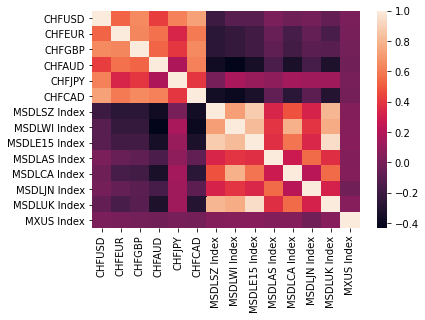

In [8]:
sns.heatmap(return_df.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)